7. 비지도 학습

- 알고 있는 출력값이나 정보 없이 학습 알고리즘을 가르쳐야 하는 모든 종류의 머신러닝
- 입력 데이터만으로 데이터에서 지식을 추출한다. 



7.1 비지도 학습의 종류 

- 비지도 변환 -> 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원레 데이터보다 쉽게 해석할 수 있게 만드는 알고리즘

  (주로 고차원 데이터 특성의 수를 줄이고, 필요한 특징을 포함한 데이터로 표현하는 방법인 차원축소가 대표적이다 )
  
  ex) 시각화를 위한 데이터셋의 2차원 변환
  
  ( 데이터를 구성하는 단위나 성분 탐색하는 경우 ex) 텍스트에서 주제 추출 )
  
- 군집 알고리즘 -> 데이터를 비슷한 것끼리 그룹으로 묶는 것


7.2 비지도 학습의 도전과제 

- 비지도 학습에서 가장 어려운 것은 알고리즘이 유용한 것을 학습했는지 평가하는 것

  ( 레이블이 없는 데이터에 적용하기 때문에 올바른 출력이 무엇인지 모르기 때문 )
  
- 비지도 학습 알고리즘은 데이터 과학자가 데이터를 더 잘 이해하고 싶을 때 탐색적 분석단계와 전처리에서 많이 이용
  
  ( 지도학습의 정확도 향상, 메모리, 시간 절약 )
  
- 비지도 학습의 간단한 전처리 메서드 중 하나인 스케일 조정은 비지도 방식이다. 

7.3 데이터 전처리와 스케일 조정
- SVM과 신경망 같은 알고리즘은 데이터의 스케일에 매우 민감하다. 따라서 알고리즘에 맞게 데이터 특성 값 조정 필요

In [1]:
import mglearn

c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib

In [ ]:
from IPython.display import Image
# Image("img/picture.png")  code안에서 나오게 할 때
#![title](img/picture.png) markdown안에서 나오게 할 때

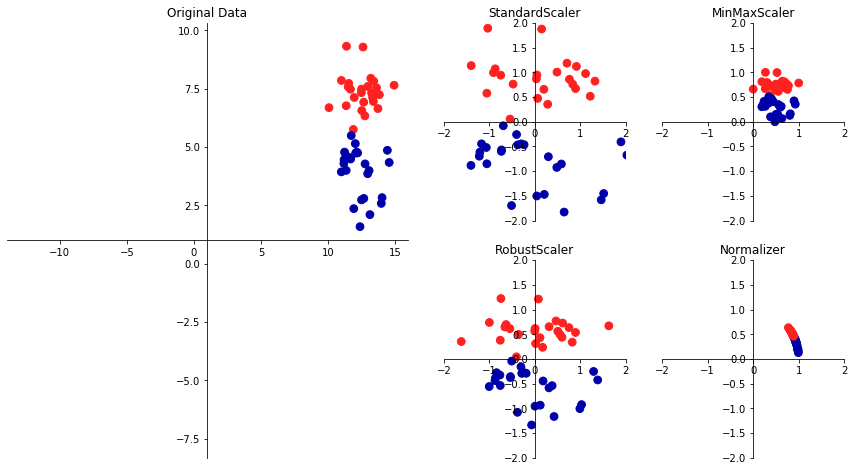

In [2]:
mglearn.plots.plot_scaling()

![title](Datapreprocessing_AG.PNG)

- Original Data는 두 개의 특성을 인위적으로 만든 이진 분류 데이터셋이다. 

- StandardScaler ( scikit-learn) 은 각 특성의 평균을 0, 분산을 1로 변경 하여 모든 특성이 같은크기를 가진다 ( 최솟값, 최댓값 제한 X )

- RobustScaler는 특성들이 같은 스케일을 갖어 StandardScaler와 비슷하지만, 평균과 분산 대신 중간 값, 사분위 값 이용
  
  ( 그래서 RobustScaler는 이상치에 영향을 받지 않는다. )

- MinMaxScaler는 모든 특성이 0과 1사이에 위치하도록 데이터를 변경한다. 
  
  q2는 중간값, q1은 1사분위 값, q3은 3분위값

- Normaliezer는 벡터의 유클리디안 길이가 1이 되도록 포인트를 조정한다. 
  
  (데이터 포인트가 길이에 반비례하여 스케일이 조정된다. 벡터의 길이는 상관없고 데이터의 방향만이 중요할때 많이 이용)

  ( norm의 매개변수 l1, l2, max 세 옵션을 제공하며, 유클리디안 거리를 의미하는 l2가 기본값이다. 특성의 통계치를 이용하는 위의 3가지와 달리 
    데이터 포인트마다 각기 정규화된다.)

In [7]:
# cancer 데이터 이용하여 스케일 조정 적용 ( 지도학습 알고리즘 적용하기 전에 적용 필요 )
# 커널 SVM(SVC)를 적용하고 전처리에는 MinMaxSclaer 이용 

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 1)

print(X_train.shape)
print(X_test.shape)

# 총 569개의 데이터 포인트와 30개의 특성 

(426, 30)
(143, 30)


In [10]:
#MinMaxScaler 임포트

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

#실제로 젹용하려면 transform 메서드 이용

X_train_scaled = scaler.transform(X_train)

# 스케일 조정 후, 데이터 셋 속성 출력

print('변환 후 크기 :', X_train_scaled.shape)
print('스케일 조정 전 특성별 최소값 :\n',X_train.min(axis=0))
print('스케일 조정 전 특성별 최대값 :\n',X_train.max(axis=0))
print('스케일 조정 후 특성별 최소값 :\n',X_train_scaled.min(axis=0))
print('스케일 조정 후 특성별 최대값 :\n',X_train_scaled.max(axis=0))

변환 후 크기 : (426, 30)
스케일 조정 전 특성별 최소값 :
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값 :
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값 :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값 :
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


변환된 데이터의 배열 크기는 원래 데이터와 동일하며 특성 값이 이동되거나 크기가 조정되었을 뿐이다.

In [12]:
#svm을 적용하기 위해 테스트 셋도 변환
X_test_scaled = scaler.transform(X_test)

print('스케일 조정 후 특성별 최소값 :\n',X_test_scaled.min(axis=0))
print('스케일 조정 후 특성별 최대값 :\n',X_test_scaled.max(axis=0))

#테스트 세트의 최솟값과 범위를 이용한 것이 아닌 트레인 세트를 이용하여 0~1의 범위를 초과할 수 있다.
#모든 스케일 모델은 항상 훈련, 테스트 세트에 같은 변환을 적용하여야 한다.
#이렇게 변환된 데이터 셋으로 SVM을 적용하면 된다. 

스케일 조정 후 특성별 최소값 :
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값 :
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


* Quantile Transformer와 PowerTransformer

  - scikit-learn에 추가된 QuantileTransformer 변환기 
  
    기본적으로 1000개의 분위를 사용하여 데이터를 균등하게 분포시킴으로 Robust와 비슷하게 
    이상치에 민감하지 않으며 전체 데이터를 0과 1사이로 압축한다. 
    
  - scikit-learn에 추가된 PowerTransformer
  
    method 매개변수에 'yeo-johnson'(기본값)과 'box-cox'알고리즘을 지정 하여 이용

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

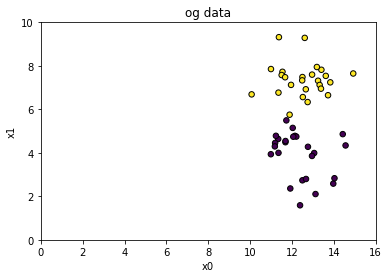

In [16]:
X, y = make_blobs(n_samples = 50, centers = 2, random_state= 4, cluster_std = 1 )
X +=3

plt.scatter(X[:,0],X[:,1], c= y, s = 30, edgecolors = 'black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0,10)
plt.ylabel('x1')
plt.title("og data")
plt.show()

c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


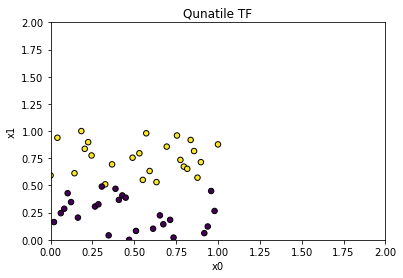

In [25]:
#QunatileTransform 적용

scaler = QuantileTransformer(n_quantiles=1000)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0],X_trans[:,1], c= y, s = 30, edgecolors = 'black')
plt.xlim(0, 2)
plt.xlabel('x0')
plt.ylim(0,2)
plt.ylabel('x1')
plt.title("Qunatile TF")
plt.show()

#0과 1사이에 고르게 분포되어 있는 것을 확인

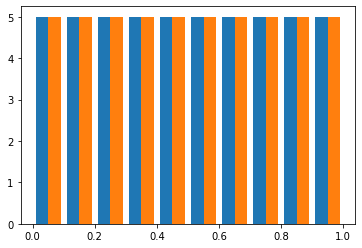

In [26]:
#히스토그램을 그려 균등분로를 더 쉽게 확인

plt.hist(X_trans)
plt.show()

- QuantileTransformer 의 분위수는 n_quanttiles 매개변수에서 설정할 수 있으며 기본값은 100이다. 
- 속성에는 특성별로 계산된 분위값이 들어 있어 속성의 크기는 (n_quantiles, n_features)다 
- QuantileTranformer는 output_distribution 매개변수에서 normal로 지정하여 균등 분포가아닌 정규분포로 출력을 바꿀 수 있다.

c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


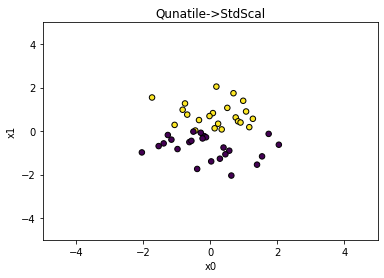

In [30]:
# 정규 분포로 바꾼 경우 
scaler = QuantileTransformer(output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0],X_trans[:,1], c= y, s = 30, edgecolors = 'black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5,5)
plt.ylabel('x1')
plt.title("Qunatile->StdScal")
plt.show()



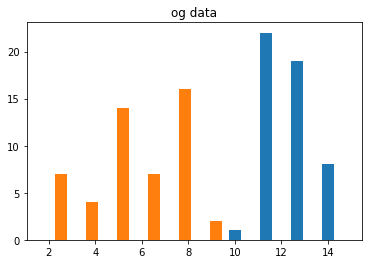

c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


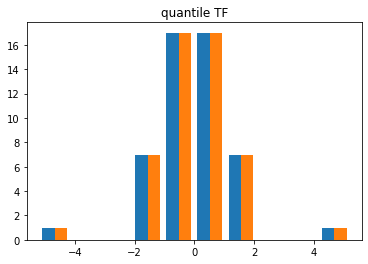

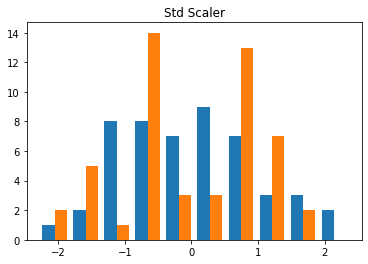

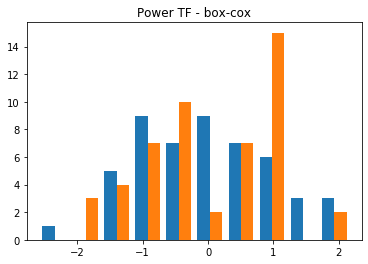

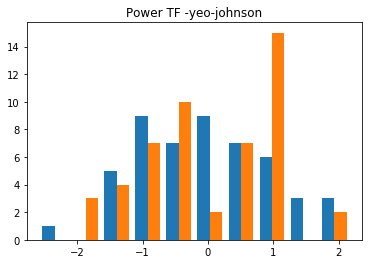

In [32]:
# QuantileTransformer와 StandardScaler, PowerTransformer의 두 알고리즘의 정규분포로 변환하는 차이 확인

plt.hist(X)
plt.title("og data")
plt.show()

X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('quantile TF')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('Std Scaler')
plt.show()

X_trans = PowerTransformer(method = 'box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('Power TF - box-cox')
plt.show()

X_trans = PowerTransformer(method = 'yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('Power TF -yeo-johnson')
plt.show()

#실제 데이터셋 마다 어떤 변환이 정규분포에 가깝게 변환할지 사전에 확인하기 어려우므로, 각 변환기의 결과를 히스토 그램으로 확인하는 것이 좋다. 

- 지도학습 모델에서 테스트 셋을 사용하려면 훈련셋, 테스트셋에 같은 Transform을 적용해야 한다. 
- 이와 반대로 테스트 셋의 최솟값과 범위를 사용하면 기존 데이터의 왜곡이 일어난다. (배열이 뒤죽박죽 섞인다)

In [36]:
# SVC를 학습시킬 때, MinMaxScaler의 효과 확인

#기본 적용
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svm = SVC(C=100)

svm.fit(X_train, y_train)
print('테스트 셋 정확도 :{:.2f}'.format(svm.score(X_test, y_test)))

테스트 셋 정확도 :0.63


c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
#MinMaxScaler적용 ( 0~ 1사이로 스케일 조정 )
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

svm.fit(X_train_s, y_train)

print('스케일 조정 정확도 :{:.2f}'.format(svm.score(X_test_s,y_test)))

스케일 조정 정확도 :0.97


c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [38]:
#Std Scaler로 평균0, 분산 1을 갖도록 조정
scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

svm.fit(X_train_s, y_train)

print('스케일 조정 정확도 :{:.2f}'.format(svm.score(X_test_s,y_test)))

스케일 조정 정확도 :0.96
